# Applying Hill Climbing Heuristic Search on TSP

# The Technique (Hill Climbing)

Hill Climbing is a heuristic search used for mathematical optimization problems in the field of Artificial Intelligence. 
Given a large set of inputs and a good heuristic function, it tries to find a sufficiently good solution to the problem. This solution may not be the global optimal maximum.


1.   In the above definition, mathematical optimization problems imply that hill-climbing solves the problems where we need to maximize or minimize a given real function by choosing values from the given inputs. Example-Travelling salesman problem where we need to minimize the distance traveled by the salesman.
2.   ‘Heuristic search’ means that this search algorithm may not find the optimal solution to the problem. However, it will give a good solution in a reasonable time.
1.   A heuristic function is a function that will rank all the possible alternatives at any branching step in the search algorithm based on the available information. It helps the algorithm to select the best route out of possible routes.

Types:


1.   Simple Hill climbing: It examines the neighboring nodes one by one and selects the first neighboring node which optimizes the current cost as the next node. 
2.   Steepest-Ascent Hill climbing: It first examines all the neighboring nodes and then selects the node closest to the solution state as of the next node. 

1.    Stochastic hill climbing: It does not examine all the neighboring nodes before deciding which node to select. It just selects a neighboring node at random and decides (based on the amount of improvement in that          neighbor) whether to move to that neighbor or to examine another.
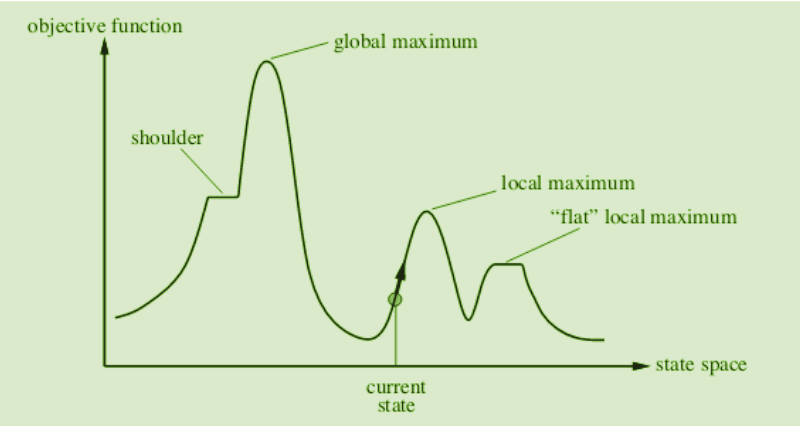










# The Problem (Travelling Salesman Problem)

Travelling Salesman Problem (TSP) : Given a set of cities and distances between every pair of cities, the problem is to find the shortest possible route that visits every city exactly once and returns to the starting point. 
Note the difference between Hamiltonian Cycle and TSP. The Hamiltonian cycle problem is to find if there exists a tour that visits every city exactly once. Here we know that Hamiltonian Tour exists (because the graph is complete) and in fact, many such tours exist, the problem is to find a minimum weight Hamiltonian Cycle.

# Procedure

Hill climbing is a mathematical optimization algorithm, which means its purpose is to find the best solution to a problem which has a (large) number of possible solutions.

In the Travelling salesman problem, we have a salesman who needs to visit a number of cities exactly once, after which he returns to the first city. The distances between each pair of cities are known, and we need to find the shortest route. As you can imagine, there is (often) a large number of possible solutions (routes) to a specific Travelling salesman problem; the goal is to find the best (i.e. the shortest) solution.

Hill climbing tries to find the best solution to this problem by starting out with a random solution, and then generate neighbours: solutions that only slightly differ from the current one. If the best of those neighbours is better (i.e. shorter) than the current one, it replaces the current solution with this better solution. It then repeats the pattern by again creating neighbours. If at some point no neighbour is better than the current solution, it returns the then current solution. That’s it! The algorithm is quite simple, but it needs to be said that it doesn’t always find the best solution. It can get stuck in a local maximum: a place where the current solution isn’t the best solution to the problem, but where none of the direct neighbours of the current solution are better than the current solution. As described, the algorithm will stop at such a point, unfortunately without returning the best solution. More complicated algorithms exist that have a higher chance of finding the best solution, but they often take more computational resources.

# Code

In [68]:
##Import Libraries
import random
import numpy as np
import networkx as nx

In [69]:
#coordinate of the points/cities
coordinate = np.array([[1,2], [30,21], [56,23], [8,18], [20,50], [3,4], [11,6], [6,7], 
                       [15,20], [10,9], [12,12], [46,17], [60,55], [100,80], [16,13]])

In [70]:
#adjacency matrix for a weighted graph based on the given coordinates
def generate_matrix(coordinate):
    matrix = []
    for i in range(len(coordinate)):
        for j in range(len(coordinate)) :       
            p = np.linalg.norm(coordinate[i] - coordinate[j])
            matrix.append(p)
    matrix = np.reshape(matrix, (len(coordinate),len(coordinate)))
    #print(matrix)
    return matrix

In [71]:
#finds a random solution    
def solution(matrix):
    points = list(range(0, len(matrix)))
    solution = []
    for i in range(0, len(matrix)):
        random_point = points[random.randint(0, len(points) - 1)]
        solution.append(random_point)
        points.remove(random_point)

    return solution

In [72]:
#computes the path based on the random solution
def path_length(matrix, solution):
    cycle_length = 0
    for i in range(0, len(solution)):
        cycle_length += matrix[solution[i]][solution[i - 1]]
    return cycle_length

In [73]:
#generate neighbors of the random solution by swapping cities and returns the neighbor
def get_neighbors(solution):
    neighbors = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            neighbor = solution.copy()
            neighbor[i] = solution[j]
            neighbor[j] = solution[i]
            neighbors.append(neighbor)
    return neighbors

In [74]:
#returns the best neighbor
def get_best_neighbor(matrix, neighbors):
            
    #assume that the first neighbor in the list is the best neighbor      
    best_neighbor = neighbors[0]
    best_path = path_length(matrix, best_neighbor)
    
    #check if there is a better neighbor
    for neighbor in neighbors:
        current_path = path_length(matrix, neighbor)
        if current_path < best_path:
            best_path = current_path
            best_neighbor = neighbor
    return best_neighbor, best_path

In [75]:
def hill_climbing(coordinate):
    matrix = generate_matrix(coordinate)
    current_solution = solution(matrix)
    current_path = path_length(matrix, current_solution)
    neighbors = get_neighbors(current_solution)
    best_neighbor, best_neighbor_path = get_best_neighbor(matrix, neighbors)

    while best_neighbor_path < current_path:
        current_solution = best_neighbor
        current_path = best_neighbor_path
        neighbor = get_neighbors(current_solution)
        best_neighbor, best_neighbor_path = get_best_neighbor(matrix, neighbor)

    return current_path, current_solution

# Result



The solution is 
 [1, 8, 3, 4, 13, 12, 6, 0, 5, 7, 9, 10, 14, 11, 2] 
The path length is 
 356.4422245122236


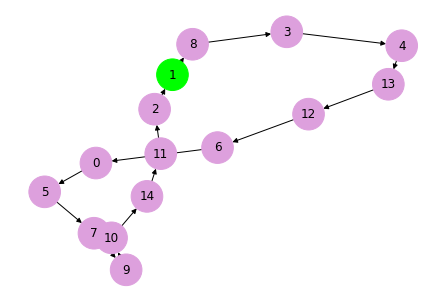

In [76]:
def graph(coordinate):
    final_solution = hill_climbing(coordinate)
    G = nx.DiGraph()
    temp = final_solution[1]
    G.add_nodes_from(final_solution[1])
    
    for i in range(1, len(final_solution[1])):
        G.add_edge(temp[i - 1], temp[i])
    G.add_edge(temp[len(temp) - 1], temp[0])
    color_map = []
    for node in G:
        if node == final_solution[1][0]:
            color_map.append('lime')
        else: 
            color_map.append('plum')
    nx.draw(G, with_labels = True, node_color = color_map, node_size = 1000)
    print("The solution is \n", final_solution[1], "\nThe path length is \n", final_solution[0])
    return

    
graph(coordinate)
   

# Remarks

As it turns out, it’s quite straightforward to make a problem generator for our situation. Let’s define a function taking one argument: nCities, which specifies the number of cities we want for our Travelling salesman problem. The problem generator can then simply loop nCities times, each time creating a list of distances (distances) for a new city. Such a distance list can be filled with random values, except where the value is already known: when the loop is adding the distance of the city to itself (which should be zero), and when it is adding a value it has already calculated. This last one is the case when the algorithm is adding the distance from city B to city A when it has already added the distance from city A to city B, since these distance should be the same.

Each distances can be simply added to the initially empty tsp list, which in the end is returned.

The path langth is not the same for each solution. This means our Hill climber isn’t perfect. It would be interesting to compare Hill climbing to more sophisticated algorithms. They may perform better, but take more time to do so.